In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import nltk;
import spacy
import string

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})

np.random.seed(42)
%config Completer.use_jedi = False
pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 100)

nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv('mindvalley_fb_comments.csv')
df.rename(columns={"comment":"comments"},inplace=True)
df.head()

,Unnamed: 0,comments
0,0,After this class you'll see why Silicon Valley...
1,1,The shirt is almost identical to my moms fancy...
2,2,"When you buy a program, can you stop, backup,..."
3,3,Exactly what is lucid dreaming? Thank you for ...
4,4,"I have lucid dreams all the time, also have ov..."


In [3]:
df.comments[286]

'For fitness goals??? - PANDA\n\nFitness entire noodle bowl in my mouth\n\nI’ll see myself out\n🚪🚶🏼\u200d♂️'

In [4]:
df.comments.replace("\S*@\S*" , "", regex=True, inplace = True)
df.comments.replace("\S*#\S*" , "", regex=True, inplace = True)
df.comments.replace("\S*http\S*" , "", regex=True, inplace = True)
df.comments.replace("_" , " ", regex=True, inplace = True)
df.comments.replace("^" , " ", regex=True, inplace = True)
df.comments.replace("\n" , " ", regex=True, inplace = True)

In [5]:
df.comments[286]

' For fitness goals??? - PANDA  Fitness entire noodle bowl in my mouth  I’ll see myself out 🚪🚶🏼\u200d♂️'

In [6]:
for i in string.punctuation:
    try:
        df.comments.replace(f"\{i}" , "", regex=True, inplace = True)
    except: pass

In [7]:
df.comments[286]

' For fitness goals  PANDA  Fitness entire noodle bowl in my mouth  I’ll see myself out 🚪🚶🏼\u200d♂️'

In [8]:
junk_words = "ve xx tqvm yessssssssssit youuuuuu nan nt citi kashif a very were yet than through via here rishisunak more much getting go going ive dont able when which who year barclays hsbcin amp like an no any since after banking im there out how starlingbank starling one only again over other then am may some do cant about banks would could its even their after has them get got within now all just if what or at had hsbcukbusiness up by into will an was our us so been hsbcuk co om ke ha gone your we can from as but to the hsbc and of you for are have they is my hsbc_uk with it in on this ðÿ be not bank me that"
junk_words_list = junk_words.split(" ")

In [9]:
def remove_unicode(text):

    try:
        text = text.encode("latin_1").decode("raw_unicode_escape").encode('utf-16', 'surrogatepass').decode('utf-16')
    except:
        text = text

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)

    text = re.sub(emoji_pattern, '', str(text))
    text = ''.join(text.split('\\n')) # to remove uncompiled \n
    text = re.sub('\n', '', text)     # to remove compiled \n

    return text

In [10]:
def word_root(text):
    list_data3=[]
    text = remove_unicode(text)
    doc = nlp(text)
    for token in doc:
        if token.text.isalpha():
            lemma = token.lemma_
            list_data3.append(lemma)
        else:pass
    return " ".join(list_data3)
df.comments = df.comments.apply(lambda x: word_root(str(x).lower()))  

In [11]:
df.comments.value_counts()

thank you                                                                                                                                                                                                                                                             53
nan                                                                                                                                                                                                                                                                   52
                                                                                                                                                                                                                                                                      47
je                                                                                                                                                                                                           

In [12]:
df.replace('nan', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)
df.replace('do', np.nan, inplace = True)
df = df.dropna()

In [13]:
df.comments.value_counts()

thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 53
je                                                                                                                                         

In [14]:
list_data = df.comments.unique().tolist()

In [15]:
len(list_data)

1036

In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
# distilbert-base-nli-mean-tokens
# paraphrase-distilroberta-base-v1
# roberta-large-nli-stsb-mean-tokens
#allenai-specter


In [18]:
model=SentenceTransformer('xlm-r-distilroberta-base-paraphrase-v1')
embeddings = model.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

In [19]:
best_model = umap.UMAP(n_components=5).fit_transform(embeddings)

#n_neighbors=10, min_dist=0.0, 

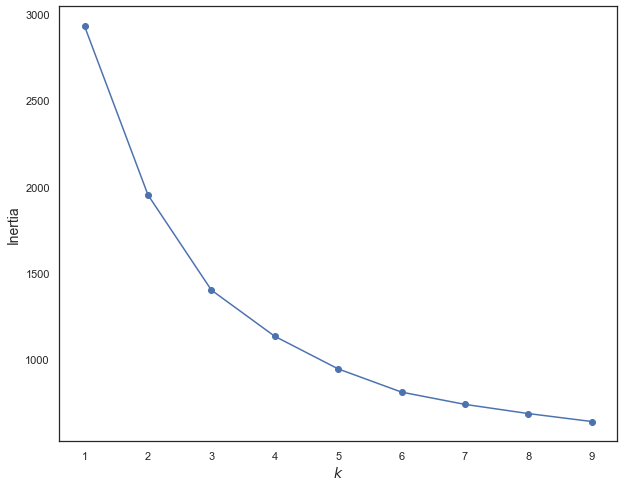

In [20]:
#inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(best_model)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [140]:
from nltk.cluster import KMeansClusterer,euclidean_distance
clusterer =KMeansClusterer(3,euclidean_distance,normalise=True)
cluster=np.array(clusterer.cluster(best_model,True))

In [105]:
cluster = KMeans(n_clusters=9, init="k-means++").fit_predict(best_model)

In [141]:
def plot(cluster = cluster):    

    clustered = (cluster >= 0)
    reduced_dim = umap.UMAP(n_components=2).fit_transform(embeddings)



    unique, counts = np.unique(cluster, return_counts=True)
    print(dict(zip(unique, counts)))

    plt.scatter(reduced_dim[~clustered, 0],
                reduced_dim[~clustered, 1],
                c=(0.5,0.5,0.5),
                # s=1,
                alpha=0.5
                )
    plt.scatter(reduced_dim[clustered, 0],
                reduced_dim[clustered, 1],
                c=cluster[clustered],
                # s=1,
                cmap='Accent')
    plt.show()

{0: 434, 1: 374, 2: 228}


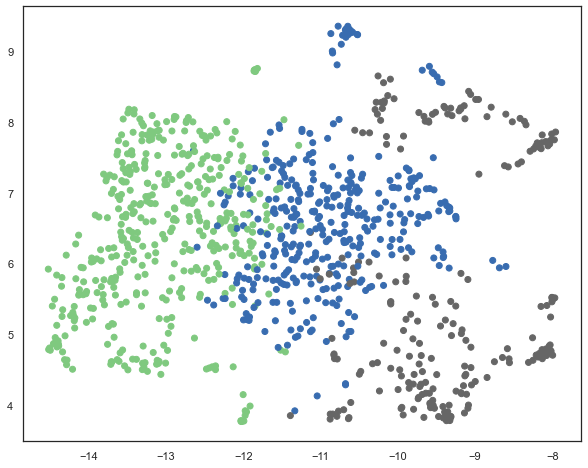

In [142]:
plot()

In [143]:
len(cluster)

1036

In [144]:
docs = pd.DataFrame(list_data,columns=["comments"])
docs["cluster"] = cluster
labeled_docs = docs.groupby(["cluster"], as_index=False).agg({"comments": " ".join})
labeled_docs.comments.replace(r"\S*clas\S*", "class", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*teach\S*", "teach", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*aprend\S*", "aprende", regex=True, inplace = True)


def shortener(text):
    word_list = []
    text = text.split(" ")
    [word_list.append(i) for i in text if len(i)>2]
    return(" ".join(word_list))

labeled_docs.comments = labeled_docs.comments.apply(lambda x:shortener(x))
labeled_docs

,cluster,comments
0,0,the shirt almost identical mom fancy china pla...
1,1,after this class you see why silicon valley co...
2,2,exactly what lucid dreaming thank you for your...


In [145]:
from keybert import KeyBERT
array_text = labeled_docs.comments.tolist()
    
kw_extractor = KeyBERT(model=model)
trigram = []
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=3,keyphrase_ngram_range=(3, 3),stop_words=["ooaasmamn",
                                                                                                            "for",
                                                                                                            "nás",
                                                                                                            "jajajajajajaja",
                                                                                                            "and",
                                                                                                            "this",
                                                                                                            "ptr",
                                                                                                            "ann",
                                                                                                            "you",
                                                                                                            "the",
                                                                                                            "pro"])
    print(f'\033[1m   Trigram Cluster {j+1}: \033[0m')
    print([word for word in keywords])
    trigram.append([word[0] for word in keywords])

   Trigram Cluster 1: 
[('sign people class', 0.4577), ('class dope its', 0.4491), ('cola happiness eheee', 0.3967)]
   Trigram Cluster 2: 
[('get customer support', 0.3903), ('gusta curso devolvemos', 0.385), ('love your program', 0.3849)]
   Trigram Cluster 3: 
[('experience lucid dream', 0.6139), ('have lucid dream', 0.5589), ('look lucid dream', 0.5528)]


In [146]:
bigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(2, 2),stop_words=["ooaasmamn",
                                                                                                            "for",
                                                                                                            "nás",
                                                                                                            "jajajajajajaja",
                                                                                                            "and",
                                                                                                            "this",
                                                                                                            "ptr",
                                                                                                            "ann",
                                                                                                            "you",
                                                                                                            "the",
                                                                                                            "pro"])
    print(f'\033[1m   Bigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    bigram.append([word[0] for word in keywords])

   Bigram Cluster 1: 
[('graduation vishen', 0.4159), ('people class', 0.4023), ('class dope', 0.3841), ('denisse samhiveryl', 0.3699), ('goalsetting class', 0.3666), ('ang demokratikong', 0.3613), ('elliott kearstin', 0.3608), ('mariam cisse', 0.3591), ('vishen important', 0.3538), ('kazz denisse', 0.3536)]
   Bigram Cluster 2: 
[('watch soon', 0.385), ('buy course', 0.3776), ('aprende entonce', 0.37), ('try program', 0.3666), ('aprende pue', 0.3597), ('course get', 0.3565), ('course email', 0.3529), ('aprende educación', 0.3516), ('come soon', 0.35), ('gusta curso', 0.3483)]
   Bigram Cluster 3: 
[('thank dream', 0.5259), ('lucid dream', 0.5113), ('lucid dreaming', 0.4691), ('dream dream', 0.4597), ('your dream', 0.4566), ('inspiration lucid', 0.4537), ('experience lucid', 0.4498), ('benefit dream', 0.4401), ('dream more', 0.4354), ('have lucid', 0.4303)]


In [147]:
unigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(1, 1),stop_words=["ooaasmamn",
                                                                                                            "for",
                                                                                                            "nás",
                                                                                                            "jajajajajajaja",
                                                                                                            "and",
                                                                                                            "this",
                                                                                                            "ptr",
                                                                                                            "ann",
                                                                                                            "you",
                                                                                                            "the",
                                                                                                            "pro",
                                                                                                            "pitbullgastrobarukrainemillionariopooreameruca"])
    print(f'\033[1m   Unigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    unigram.append([word[0] for word in keywords])

   Unigram Cluster 1: 
[('class', 0.3895), ('attend', 0.3497), ('course', 0.3402), ('congrat', 0.3336), ('attendan', 0.3326), ('graduation', 0.3265), ('resonate', 0.3224), ('belive', 0.3216), ('behalf', 0.3197), ('hence', 0.3169)]
   Unigram Cluster 2: 
[('aprende', 0.3367), ('soon', 0.3073), ('empezar', 0.3064), ('enviármelos', 0.3053), ('saad', 0.295), ('preach', 0.2912), ('learn', 0.2892), ('tell', 0.2827), ('silicon', 0.2827), ('educate', 0.2794)]
   Unigram Cluster 3: 
[('dream', 0.3777), ('meditation', 0.3477), ('tack', 0.338), ('remind', 0.3354), ('merci', 0.3277), ('mulțumesc', 0.3276), ('děkujeme', 0.3235), ('dreaming', 0.3198), ('grazie', 0.3152), ('appreciate', 0.315)]


In [149]:
for i in range(3):
    clusterer=[]
    print(f'\033[1m   Cluster {i+1}: \033[0m')
    clusterer.append(trigram[i][0])
    
    wor=[]
    for w in trigram[i][1].split(" "):
        wor.append(w in trigram[i][0])
    if all(wor):
        clusterer.append(trigram[i][2])
    else:
        clusterer.append(trigram[i][1])
        
    for m, n in zip(trigram[i][0:2]*5,bigram[i][0:10]):
        first,second = n.split(" ")
        if not(first in m and second in m) and (first != second):
            clusterer.append(n)
    clusterer = clusterer[:5]
    [clusterer.append(j) for j in unigram[i]]
    print(clusterer)
    

   Cluster 1: 
['sign people class', 'class dope its', 'graduation vishen', 'people class', 'class dope', 'class', 'attend', 'course', 'congrat', 'attendan', 'graduation', 'resonate', 'belive', 'behalf', 'hence']
   Cluster 2: 
['get customer support', 'gusta curso devolvemos', 'watch soon', 'buy course', 'aprende entonce', 'aprende', 'soon', 'empezar', 'enviármelos', 'saad', 'preach', 'learn', 'tell', 'silicon', 'educate']
   Cluster 3: 
['experience lucid dream', 'have lucid dream', 'thank dream', 'lucid dreaming', 'your dream', 'dream', 'meditation', 'tack', 'remind', 'merci', 'mulțumesc', 'děkujeme', 'dreaming', 'grazie', 'appreciate']
